# Exercise 2.13

_Let us see what happens if we reuse the same data multiple times. We have
N trials and measure r successes. Show that if you reuse the data n times,
starting at first with a flat prior and then using the posterior from one use of
the data as the prior for the next use, you get
\begin{equation}
P_{n}(p|r, N ) =\frac{(nN + 1)!}{(nr)!(nN − nr)!} p^{nr} (1 − p)^{n(N −r)} .
\end{equation}
What are the expectation value and variance for p in the limit $n → ∞$?_


We will show the result using proof by induction

We start with the binomial distribution
\begin{equation}
P(r|p,N) = \binom{N}{r} p^{r}(1-p)^{N-r}\\
\end{equation}
We write down Bayes theorem:
\begin{equation}
P(p|r,N) = \frac{P(r|N,p)P_{0}(p)}{P{r|N}}\\
\end{equation}
Law of total Probability
\begin{equation}
P(p|r,N) = \frac{P(r|N,p)P_{0}(p)}{\int P(r|N,p)P_{0}(p)}
\end{equation}
We start with a flat prior
\begin{equation}
P_{0}(p) = 1, \textsf{since} \int P_{0}(p)dp \overset{!}{=} 1, ~~p \in [0,1]
\end{equation}


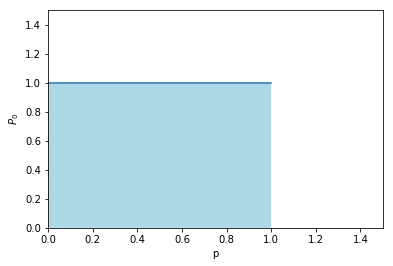

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
def f(x):
    a=1.0
    return a
x=list()
y=list()
for i in range(1000):
    x.append(i/1000.)
    y.append(f(x))
plt.ylabel(r"$P_{0}$") 
plt.xlabel('p')
plt.ylim(0,1.5)
plt.xlim(0,1.5)
plt.plot(x,y)
plt.fill_between(x,0,y,facecolor='lightblue')
plt.show()

We end up with:
\begin{equation}
P_{1}(p|r,N) =\frac{\binom{N}{r} p^{r}(1-p)^{N-r}}{\int^{1}_{0} \binom{N}{r} p^{r}(1-p)^{N-r} dp} = \frac{p^{r}(1-p)^{N-r}}{\int^{1}_{0}p^{r}(1-p)^{N-r} dp}
\end{equation}
We use the standard Betafunction:
\begin{equation}
B(x,y) = \int^{1}_{0} t^{x-1}(1-t)^{y-1} dt = \frac{(x-1)!(y-1)!}{(x+y-1)!} 
\end{equation}
We use $B(x=r+1,y=N-r+1) = \frac{(r+1-1)!(N-r+1-1)!}{(r+1+N-r+1)!}$ and show the initial step:
\begin{equation}
P_{1}(p|r, N ) =\frac{(N + 1)!}{(r)!(N − r)!} p^{r} (1 − p)^{N −r}~~~~.
\end{equation}


Now we show the induction step:
\begin{equation}
P_{n+1}(p|r, N ) = \frac{P(r|N,p)P_{n}(p)}{\int P(r|N,p)P_{n}(p)}
\end{equation}
For $P_{n}$ we insert the assumption and get:
\begin{equation}
P_{n+1}(p|r,N ) = \frac{p^{r}(1-p)^{N-r} \cdot  p^{nr}(1-p)^{n(N-r)}}{\int^{1}_{0} p^{r}(1-p)^{N-r} \cdot  p^{nr}(1-p)^{n(N-r)}dp}
\end{equation}
\begin{equation}
\Rightarrow P_{n+1}(p|r, N ) =   \frac{p^{(n+1)r}(1-p)^{(n+1)(N-r)}}{\int^{1}_{0} p^{(n+1)r}(1-p)^{(n+1)(N-r)}dp}
\end{equation}
Again applying the Betafunction gives the desired result:
\begin{eqnarray}
B((n+1)r+1,(n+1)(N-r)+1) = \frac{((n+1)r)!((n+1)(N-r))!}{((n+1)N +1)! }\\
\Rightarrow P_{n+1}(p|r, N ) =\frac{((n+1)N + 1)!}{((n+1)r)!((n+1)N − (n+1)r)!} p^{(n+1)r} (1 − p)^{(n+1)(N −r)} .
\end{eqnarray}

The calculation of the Expectation value is straightforward:
\begin{eqnarray}
E_{n} =& \int^{1}_{0} p \cdot P_{n}(p|r,N) dp\\
=& \int^{1}_{0} \frac{(nN + 1)!}{(nr)!(nN − nr)!} p^{nr+1} (1 − p)^{n(N −r)} dp\\
=& \frac{(nN + 1)!}{(nr)!(nN − nr)!} B(nr+2,n(N-r)+1)\\
=& \frac{(nr+1)!(n(N-r))!}{(nN+2)!}\\
=& \frac{nr+1}{nN+2} = \frac{r+\frac{1}{n}}{N+\frac{2}{n}}
\end{eqnarray}
We take the limit n $\rightarrow \infty$:
\begin{equation}
\underset{n \rightarrow \infty}{\lim} E_{n} = \underset{n \rightarrow \infty}{\lim} \frac{r+\frac{1}{n}}{N+\frac{2}{n}} = \frac{r}{N}
\end{equation}